In [8]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
from sklearn import metrics 
import matplotlib.pyplot as plt



data = pd.read_csv('donut.csv').values
x = data[:,:2]
y = data[:,2]

Visualize dataset 

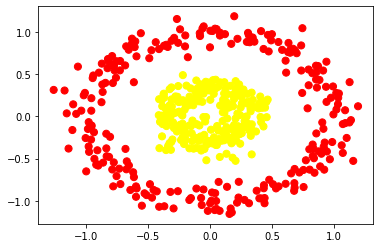

In [9]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plt.show()

Split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data[:, :2], data[:, 2] , test_size=0.2, random_state=42, shuffle=False)

# x_train = np.expand_dims(x_train, axis=1)
# x_test = np.expand_dims(x_test, axis=1)
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

Apply KNN

/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


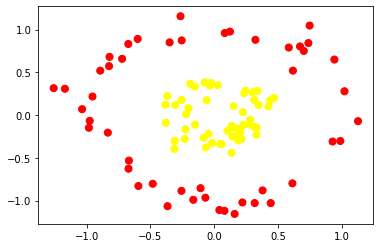

In [12]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, s=50, cmap='autumn')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=25, cmap='autumn')
plt.show()

Show metrics (accuracy, recall, precision)

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("accuracy:", accuracy)
print("recall:", recall)
print("precision:", precision)

mse_log_regr = metrics.mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse_log_regr)

accuracy: 1.0
recall: 1.0
precision: 1.0
Mean squared error: 0.0


### Lasso, Ridge and Bayes

In [15]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=123)

In [16]:
lasso = Lasso()
ridge = Ridge()
lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)

print("Lasso Coefficient", lasso.coef_)
print("Ridge Coefficient", ridge.coef_)

Lasso Coefficient [-6.29657633e-02  3.50956640e-02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  2.26979134e+00  6.77955847e-04 -6.45065773e-01
  1.93545727e-01 -1.35087027e-02 -6.45345873e-01  4.49042185e-03
 -6.73150676e-01]
Ridge Coefficient [-1.11057981e-01  3.65852805e-02  4.69212854e-02  6.03824135e-01
 -6.97460565e+00  5.11864285e+00 -2.69870227e-02 -1.22824280e+00
  2.49139807e-01 -1.39899765e-02 -8.47813312e-01  6.95422088e-03
 -4.68816487e-01]


Task: Let's try different values for alpha for Lasso regressor and plot the validation loss.

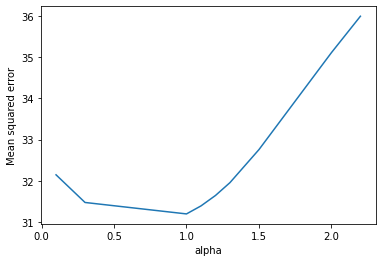

Best value of alpha: 1


In [17]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.metrics import mean_squared_error
%matplotlib inline

alphas = [2.2, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1]
losses = []
for alpha in alphas:
    # Write (5 lines): create a Lasso regressor with the alpha value.
    lasso = Lasso(alpha)

    # Fit it to the training set, then get the prediction of the validation set (x_val).
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    
    # calculate the mean sqaured error loss, then append it to the losses array
    mse = mean_squared_error(y_test, y_pred)
    losses.append(mse)
    
plt.plot(alphas, losses)
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
print("Best value of alpha:", best_alpha)

Measuring the loss on the testset with Lasso regressor with the best alpha.

In [18]:
lasso = Lasso(best_alpha)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print("MSE on testset:", mean_squared_error(y_test, y_pred))

MSE on testset: 31.19391058117396


## Loading the digit dataset
Dataset of 10 classes/ 0123456789

In [29]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# x_train = np.expand_dims(x_train, axis=1)
# x_test = np.expand_dims(x_test, axis=1)
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

print(f"x_train (shape = {x_train.shape})")
print(f"x_test: (shape = {x_test.shape})")
print(f"y_train: (shape = {y_train.shape})")
print(f"y_test: (shape = {y_test.shape})")

x_train (shape = (1437, 64))
x_test: (shape = (360, 64))
y_train: (shape = (1437, 1))
y_test: (shape = (360, 1))


Fit bayes and show accuracy


In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

accuracy: 0.85


/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Good case for looking at confusion matrix. Copy and make confusion matrix for y_pred

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[37  0  0  0  0  1  0  0  0  0]
 [ 0 30  0  0  0  0  0  1  2  0]
 [ 0  3 20  0  0  0  1  0 12  0]
 [ 0  0  0 33  0  1  0  1  2  0]
 [ 0  1  0  0 30  2  0  2  0  0]
 [ 0  0  0  0  0 34  1  0  2  0]
 [ 0  0  0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  6  0  0  0  0  0  3 29  0]
 [ 0  3  0  0  2  1  0  4  3 22]]


## Cross Validation
Cross validation comes as an alternative for the validation set splitting.

/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-pac

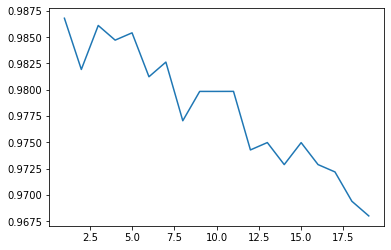

[0.986783261729982, 0.9819153614559725, 0.9860965461249619, 0.9847028179019653, 0.985396299177971, 0.9812218801799668, 0.9826156084029634, 0.9770406955109773, 0.9798281519569703, 0.9798281519569703, 0.979831534792463, 0.9742667704069551, 0.9749670173539461, 0.9728730421839585, 0.9749602516829607, 0.9728730421839585, 0.9721761780724603, 0.9693887216264673, 0.9679949934034707]
1


In [34]:
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

Ks = list(range(1, 20))
cv_scores = []
for K in Ks:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, x_train, y_train,
                             cv=7, scoring='accuracy')
    avg_score = np.mean(scores)
    cv_scores.append(avg_score)

plt.plot(Ks, cv_scores)
plt.show()
print(cv_scores)
print(Ks[np.argmax(cv_scores)])

In KNN classifier, there're several hyperparamters to tune, tuning them one by one is exhaustive approach.
Let's try a better approach called GridSearchCV.


### GridSearchCV
In GridSearch Cross-validation, you give different values for each hyperparamter and it will try all combinations for you.
At the end, it will return the best combination of hyperparamters that got the best cross-validation score.

Task:
Use gridsearch to tune 3 hyperparameters:

1. $n\_neighbors$: [1, 2, . . ., 10]
2. $weights$: ['uniform', 'distance']
3. $metric$: ['euclidean', 'manhattan', 'chebyshev', 'cosine']

Check this [link](https://scikit-learn.org/stable/modules/grid_search.html) for help.

Then measure the accuracy on the testset.

In [36]:
from sklearn.model_selection import GridSearchCV

# Write 2 lines of code to run GridSearchCV with cv=7 to tune the above hyperparams.
knn = KNeighborsClassifier()
param_grid = {
    "n_neighbors": list(range(1, 11)),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "chebyshev", "cosine"],
}
grid_search_clf = GridSearchCV(knn, param_grid)

# Task ends here!

grid_search_clf.fit(x_train, y_train)
means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(grid_search_clf.best_params_)

y_pred = grid_search_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-pac

0.985 (+/-0.011) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.985 (+/-0.011) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.981 (+/-0.010) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.985 (+/-0.011) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.983 (+/-0.013) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.985 (+/-0.014) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.983 (+/-0.014) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.985 (+/-0.013) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.984 (+/-0.016) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.985 (+/-0.014) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.981 (+/-0.013) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.983 (+/-0.013) for {'metric': 'euclidean', 'n_neighbors': 

/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-pac